# I . Data Mining

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
import torchvision.datasets.voc as voc
from tqdm import tqdm
import gc
import os
import numpy as np
import math
from tqdm import tqdm
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score, accuracy_score
import pandas as pd
from torchvision import transforms
import torchvision.models as  models
import torch.optim as optim
# from train import train_model, test
# from utils import encode_labels, plot_history
import torch.utils.model_zoo as model_zoo
# import utils
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train_set = datasets.VOCDetection(
    '.',
    year = '2007',
    image_set = 'train',
    download = True
)
val_set = datasets.VOCDetection(
    '.',
    year = '2007',
    image_set = 'val',
    download = True
)
test_set = datasets.VOCDetection(
    '.',
    year = '2007',
    image_set = 'test',
    download = True
)

100%|██████████| 460032000/460032000 [00:12<00:00, 35659696.68it/s]


Extracting ./VOCtrainval_06-Nov-2007.tar to .
Using downloaded and verified file: ./VOCtrainval_06-Nov-2007.tar
Extracting ./VOCtrainval_06-Nov-2007.tar to .


100%|██████████| 451020800/451020800 [00:12<00:00, 34835079.78it/s]


Extracting ./VOCtest_06-Nov-2007.tar to .


In [ ]:
print(f'Train Set Size: {len(train_set)}')
print(f'Val Set Size: {len(val_set)}')
print(f'Test Set Size: {len(test_set)}')

Train Set Size: 2501
Val Set Size: 2510
Test Set Size: 4952


In [ ]:
train_set[0]

(<PIL.Image.Image image mode=RGB size=500x333>,
 {'annotation': {'folder': 'VOC2007',
   'filename': '000012.jpg',
   'source': {'database': 'The VOC2007 Database',
    'annotation': 'PASCAL VOC2007',
    'image': 'flickr',
    'flickrid': '207539885'},
   'owner': {'flickrid': 'KevBow', 'name': '?'},
   'size': {'width': '500', 'height': '333', 'depth': '3'},
   'segmented': '0',
   'object': [{'name': 'car',
     'pose': 'Rear',
     'truncated': '0',
     'difficult': '0',
     'bndbox': {'xmin': '156', 'ymin': '97', 'xmax': '351', 'ymax': '270'}}]}})

In [ ]:
print(train_set[0][1]['annotation']['object'])

[{'name': 'car', 'pose': 'Rear', 'truncated': '0', 'difficult': '0', 'bndbox': {'xmin': '156', 'ymin': '97', 'xmax': '351', 'ymax': '270'}}]


(-0.5, 499.5, 332.5, -0.5)

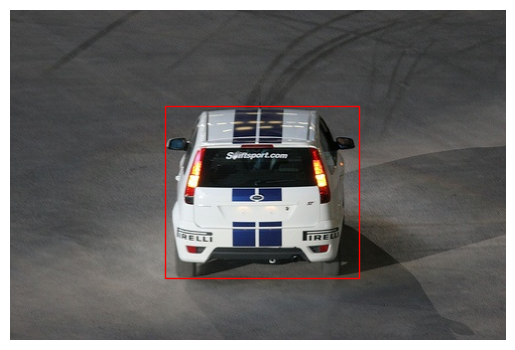

In [ ]:
plt.imshow(train_set[0][0])
bbox = train_set[0][1]['annotation']['object'][0]['bndbox']
ax = plt.gca()
rect = patches.Rectangle(
    (int(bbox['xmin']), int(bbox['ymin'])),
    int(bbox['xmax']) - int(bbox['xmin']),
    int(bbox['ymax']) - int(bbox['ymin']),
    linewidth=1,
    edgecolor='r',
    facecolor='none'
)
ax.add_patch(rect)
ax.axis('off')

cat dog


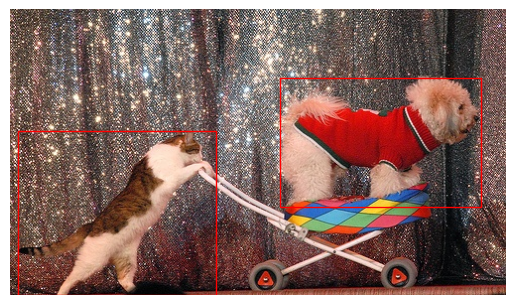

In [ ]:
plt.imshow(train_set[500][0])
bbox = train_set[500][1]['annotation']['object'][0]['bndbox']
bbox1 = train_set[500][1]['annotation']['object'][1]['bndbox']
ax = plt.gca()
rect = patches.Rectangle(
    (int(bbox['xmin']), int(bbox['ymin'])),
    int(bbox['xmax']) - int(bbox['xmin']),
    int(bbox['ymax']) - int(bbox['ymin']),
    linewidth=1,
    edgecolor='r',
    facecolor='none'
)
rect1 = patches.Rectangle(
    (int(bbox1['xmin']), int(bbox1['ymin'])),
    int(bbox1['xmax']) - int(bbox1['xmin']),
    int(bbox1['ymax']) - int(bbox1['ymin']),
    linewidth=1,
    edgecolor='r',
    facecolor='none'
)
ax.add_patch(rect)
ax.add_patch(rect1)
ax.axis('off')
print(train_set[500][1]['annotation']['object'][0]['name'],train_set[500][1]['annotation']['object'][1]['name'])

In [ ]:
classes = []
for data in train_set:
    for obj in data[1]['annotation']['object']:
        if obj['name'] not in classes:
            classes.append(obj['name'])
classes = sorted(classes)
print(f'Number of classes: {len(classes)}')
print(f'Classes: {classes}')

Number of classes: 20
Classes: ['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']


In [ ]:
one_obj = 0
more_than_one_obj = 0
for data in train_set:
    obj = data[1]['annotation']['object']
    if len(obj) == 1:
        one_obj += 1
    else:
        more_than_one_obj += 1

print('Images with one object: %d' % one_obj)
print('Images with more than one object: %d' % more_than_one_obj)

Images with one object: 905
Images with more than one object: 1596


In [ ]:
not_truncated = 0
truncated = 0
for data in train_set:
    objects = data[1]['annotation']['object']
    for obj in objects:
        if obj['truncated'] == '0':
            not_truncated += 1
        else:
            truncated += 1

print('Images with not truncated object: %d' % not_truncated)
print('Images with truncated object: %d' % truncated)

Images with not truncated object: 3736
Images with truncated object: 4108


In [ ]:
max_width = 0
min_width = np.infty

max_height = 0
min_height = np.infty

max_depth = 0
min_depth = np.infty

for data in train_set:
    width = int(data[1]['annotation']['size']['width'])
    height = int(data[1]['annotation']['size']['height'])
    depth = int(data[1]['annotation']['size']['depth'])

    if width > max_width:
      max_width=width
    if height > max_height:
      max_height=height
    if depth > max_depth:
      max_depth=depth

    if width < min_width:
      min_width=width
    if height < min_height:
      min_height=height
    if depth < min_depth:
      min_depth=depth

print('max_width :',max_width )
print('min_width :',min_width )
print('max_height:',max_height)
print('min_height:',min_height)
print('max_depth  :',max_depth  )
print('min_depth  :',min_depth  )

max_width : 500
min_width : 127
max_height: 500
min_height: 96
max_depth  : 3
min_depth  : 3


# II .Dataset

In [ ]:
class PascalVOC_Dataset(voc.VOCDetection):
    """`Pascal VOC <http://host.robots.ox.ac.uk/pascal/VOC/>`_ Detection Dataset.

        Args:
            root (string): Root directory of the VOC Dataset.
            year (string, optional): The dataset year, supports years 2007 to 2012.
            image_set (string, optional): Select the image_set to use, ``train``, ``trainval`` or ``val``
            download (bool, optional): If true, downloads the dataset from the internet and
                puts it in root directory. If dataset is already downloaded, it is not
                downloaded again.
                (default: alphabetic indexing of VOC's 20 classes).
            transform (callable, optional): A function/transform that  takes in an PIL image
                and returns a transformed version. E.g, ``transforms.RandomCrop``
            target_transform (callable, required): A function/transform that takes in the
                target and transforms it.
    """
    def __init__(self, root, year='2007', image_set='train', download=False, transform=None, target_transform=None):

        super().__init__(
             root,
             year=year,
             image_set=image_set,
             download=download,
             transform=transform,
             target_transform=target_transform)


    def __getitem__(self, index):
        """
        Args:
            index (int): Index

        Returns:
            tuple: (image, target) where target is the image segmentation.
        """
        return super().__getitem__(index)


    def __len__(self):
        """
        Returns:
            size of the dataset
        """
        return len(self.images)

# III. Utils

In [ ]:
object_categories = ['aeroplane', 'bicycle', 'bird', 'boat',
                     'bottle', 'bus', 'car', 'cat', 'chair',
                     'cow', 'diningtable', 'dog', 'horse',
                     'motorbike', 'person', 'pottedplant',
                     'sheep', 'sofa', 'train', 'tvmonitor']
def encode_labels(target):
    """
    Encode multiple labels using 1/0 encoding

    Args:
        target: xml tree file
    Returns:
        torch tensor encoding labels as 1/0 vector
    """

    ls = target['annotation']['object']

    j = []
    if type(ls) == dict:
        if int(ls['difficult']) == 0:
            j.append(object_categories.index(ls['name']))

    else:
        for i in range(len(ls)):
            if int(ls[i]['difficult']) == 0:
                j.append(object_categories.index(ls[i]['name']))

    k = np.zeros(len(object_categories))
    k[j] = 1

    return torch.from_numpy(k)

In [ ]:
def get_categories(labels_dir):
    """
    Get the object categories

    Args:
        label_dir: Directory that contains object specific label as .txt files
    Raises:
        FileNotFoundError: If the label directory does not exist
    Returns:
        Object categories as a list
    """

    if not os.path.isdir(labels_dir):
        raise FileNotFoundError

    else:
        categories = []

        for file in os.listdir(labels_dir):
            if file.endswith("_train.txt"):
                categories.append(file.split("_")[0])

        return categories
def get_ap_score(y_true, y_scores):
    """
    Get average precision score between 2 1-d numpy arrays

    Args:
        y_true: batch of true labels
        y_scores: batch of confidence scores
=
    Returns:
        sum of batch average precision
    """
    scores = 0.0

    for i in range(y_true.shape[0]):
        scores += average_precision_score(y_true = y_true[i], y_score = y_scores[i])

    return scores


In [ ]:
def plot_history(train_hist, val_hist, y_label, filename, labels=["train", "validation"]):
    """
    Plot training and validation history

    Args:
        train_hist: numpy array consisting of train history values (loss/ accuracy metrics)
        valid_hist: numpy array consisting of validation history values (loss/ accuracy metrics)
        y_label: label for y_axis
        filename: filename to store the resulting plot
        labels: legend for the plot

    Returns:
        None
    """
    # Plot loss and accuracy
    xi = [i for i in range(0, len(train_hist), 2)]
    plt.plot(train_hist, label = labels[0])
    plt.plot(val_hist, label = labels[1])
    plt.xticks(xi)
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel(y_label)
    plt.savefig(filename)
    plt.show()

In [ ]:
def append_gt(gt_csv_path, scores_csv_path, store_filename):
    """
    Append ground truth to confidence score csv

    Args:
        gt_csv_path: Ground truth csv location
        scores_csv_path: Confidence scores csv path
        store_filename: name and location to save resulting csv
    """
    gt_df = pd.read_csv(gt_csv_path)
    scores_df = pd.read_csv(scores_csv_path)

    gt_label_list = []
    for index, row in gt_df.iterrows():
        arr = np.array(gt_df.iloc[index,1:], dtype=int)
        target_idx = np.ravel(np.where(arr == 1))
        j = [object_categories[i] for i in target_idx]
        gt_label_list.append(j)

    scores_df.insert(1, "gt", gt_label_list)
    scores_df.to_csv(store_filename, index=False)

In [ ]:
def save_results(images, scores, columns, filename):
    """
    Save inference results as csv

    Args:
        images: inferred image list
        scores: confidence score for inferred images
        columns: object categories
        filename: name and location to save resulting csv
    """
    df_scores = pd.DataFrame(scores, columns=columns)
    df_scores['image'] = images
    df_scores.set_index('image', inplace=True)
    df_scores.to_csv(filename)

In [ ]:
def get_classification_accuracy(gt_csv_path, scores_csv_path, store_filename):
    """
    Plot mean tail accuracy across all classes for threshold values

    Args:
        gt_csv_path: Ground truth csv location
        scores_csv_path: Confidence scores csv path
        store_filename: name and location to save resulting plot
    """
    gt_df = pd.read_csv(gt_csv_path)
    scores_df = pd.read_csv(scores_csv_path)

    # Get the top-50 images
    top_num = 2800
    image_num = 2
    num_threshold = 10
    results = []

    for image_num in range(1, 21):
        clf = np.sort(np.array(scores_df.iloc[:,image_num], dtype=float))[-top_num:]
        ls = np.linspace(0.0, 1.0, num=num_threshold)

        class_results = []
        for i in ls:
            clf = np.sort(np.array(scores_df.iloc[:,image_num], dtype=float))[-top_num:]
            clf_ind = np.argsort(np.array(scores_df.iloc[:,image_num], dtype=float))[-top_num:]

            # Read ground truth
            gt = np.sort(np.array(gt_df.iloc[:,image_num], dtype=int))

            # Now get the ground truth corresponding to top-50 scores
            gt = gt[clf_ind]
            clf[clf >= i] = 1
            clf[clf < i] = 0

            score = accuracy_score(y_true=gt, y_pred=clf, normalize=False)/clf.shape[0]
            class_results.append(score)

        results.append(class_results)

    results = np.asarray(results)

    ls = np.linspace(0.0, 1.0, num=num_threshold)
    plt.plot(ls, results.mean(0))
    plt.title("Mean Tail Accuracy vs Threshold")
    plt.xlabel("Threshold")
    plt.ylabel("Mean Tail Accuracy")
    plt.savefig(store_filename)
    plt.show()

# IV. Train Test.

In [ ]:
def train_model(model, device, optimizer, scheduler, train_loader, valid_loader, save_dir, model_num, epochs, log_file):
    """
    Train a deep neural network model

    Args:
        model: pytorch model object
        device: cuda or cpu
        optimizer: pytorch optimizer object
        scheduler: learning rate scheduler object that wraps the optimizer
        train_dataloader: training  images dataloader
        valid_dataloader: validation images dataloader
        save_dir: Location to save model weights, plots and log_file
        epochs: number of training epochs
        log_file: text file instance to record training and validation history

    Returns:
        Training history and Validation history (loss and average precision)
    """

    tr_loss, tr_map = [], []
    val_loss, val_map = [], []
    best_val_map = 0.0

    # Each epoch has a training and validation phase
    for epoch in range(epochs):
        print("-------Epoch {}----------".format(epoch+1))
        log_file.write("Epoch {} >>".format(epoch+1))
        scheduler.step()

        for phase in ['train', 'valid']:
            running_loss = 0.0
            running_ap = 0.0

            criterion = torch.nn.BCEWithLogitsLoss(reduction='sum')
            m = torch.nn.Sigmoid()

            if phase == 'train':
                model.train(True)  # Set model to training mode

                for data, target in tqdm(train_loader):
                    #print(data)
                    target = target.float()
                    data, target = data.to(device), target.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    output = model(data)

                    loss = criterion(output, target)

                    # Get metrics here
                    running_loss += loss # sum up batch loss
                    running_ap += get_ap_score(torch.Tensor.cpu(target).detach().numpy(), torch.Tensor.cpu(m(output)).detach().numpy())

                    # Backpropagate the system the determine the gradients
                    loss.backward()

                    # Update the paramteres of the model
                    optimizer.step()

                    # clear variables
                    del data, target, output
                    gc.collect()
                    torch.cuda.empty_cache()

                    #print("loss = ", running_loss)

                num_samples = float(len(train_loader.dataset))
                tr_loss_ = running_loss.item()/num_samples
                tr_map_ = running_ap/num_samples

                print('train_loss: {:.4f}, train_avg_precision:{:.3f}'.format(
                    tr_loss_, tr_map_))

                log_file.write('train_loss: {:.4f}, train_avg_precision:{:.3f}, '.format(
                    tr_loss_, tr_map_))

                # Append the values to global arrays
                tr_loss.append(tr_loss_), tr_map.append(tr_map_)


            else:
                model.train(False)  # Set model to evaluate mode

                # torch.no_grad is for memory savings
                with torch.no_grad():
                    for data, target in tqdm(valid_loader):
                        target = target.float()
                        data, target = data.to(device), target.to(device)
                        output = model(data)

                        loss = criterion(output, target)

                        running_loss += loss # sum up batch loss
                        running_ap += get_ap_score(torch.Tensor.cpu(target).detach().numpy(), torch.Tensor.cpu(m(output)).detach().numpy())

                        del data, target, output
                        gc.collect()
                        torch.cuda.empty_cache()

                    num_samples = float(len(valid_loader.dataset))
                    val_loss_ = running_loss.item()/num_samples
                    val_map_ = running_ap/num_samples

                    # Append the values to global arrays
                    val_loss.append(val_loss_), val_map.append(val_map_)

                    print('val_loss: {:.4f}, val_avg_precision:{:.3f}'.format(
                    val_loss_, val_map_))

                    log_file.write('val_loss: {:.4f}, val_avg_precision:{:.3f}\n'.format(
                    val_loss_, val_map_))

                    # Save model using val_acc
                    if val_map_ >= best_val_map:
                        best_val_map = val_map_
                        log_file.write("saving best weights...\n")
                        torch.save(model.state_dict(), os.path.join(save_dir,"model-{}.pth".format(model_num)))

    return ([tr_loss, tr_map], [val_loss, val_map])



def test(model, device, test_loader, returnAllScores=False):
    """
    Evaluate a deep neural network model

    Args:
        model: pytorch model object
        device: cuda or cpu
        test_dataloader: test images dataloader
        returnAllScores: If true addtionally return all confidence scores and ground truth

    Returns:
        test loss and average precision. If returnAllScores = True, check Args
    """
    model.train(False)

    running_loss = 0
    running_ap = 0

    criterion = torch.nn.BCEWithLogitsLoss(reduction='sum')
    m = torch.nn.Sigmoid()

    if returnAllScores == True:
        all_scores = np.empty((0, 20), float)
        ground_scores = np.empty((0, 20), float)

    with torch.no_grad():
        for data, target in tqdm(test_loader):
            #print(data.size(), target.size())
            target = target.float()
            data, target = data.to(device), target.to(device)
            bs, ncrops, c, h, w = data.size()

            output = model(data.view(-1, c, h, w))
            output = output.view(bs, ncrops, -1).mean(1)

            loss = criterion(output, target)

            running_loss += loss # sum up batch loss
            running_ap += get_ap_score(torch.Tensor.cpu(target).detach().numpy(), torch.Tensor.cpu(m(output)).detach().numpy())

            if returnAllScores == True:
                all_scores = np.append(all_scores, torch.Tensor.cpu(m(output)).detach().numpy() , axis=0)
                ground_scores = np.append(ground_scores, torch.Tensor.cpu(target).detach().numpy() , axis=0)

            del data, target, output
            gc.collect()
            torch.cuda.empty_cache()

    num_samples = float(len(test_loader.dataset))
    avg_test_loss = running_loss.item()/num_samples
    test_map = running_ap/num_samples

    print('test_loss: {:.4f}, test_avg_precision:{:.3f}'.format(
                    avg_test_loss, test_map))


    if returnAllScores == False:
        return avg_test_loss, running_ap

    return avg_test_loss, running_ap, all_scores, ground_scores

# V. Main

In [ ]:
def main(data_dir, model_name, num, lr, epochs, batch_size = 16, download_data = False, save_result=False):
    """
    Main function

    Args:
        data_dir: directory to download Pascal VOC data
        model_name: resnet18, resnet34 or resnet50
        num: model_num for file management purposes (can be any postive integer. Your results stored will have this number as suffix)
        lr: initial learning rate list [lr for resnet_backbone, lr for resnet_fc]
        epochs: number of training epochs
        batch_size: batch size. Default=16
        download_data: Boolean. If true will download the entire 2012 pascal VOC data as tar to the specified data_dir.
        Set this to True only the first time you run it, and then set to False. Default False
        save_results: Store results (boolean). Default False

    Returns:
        test-time loss and average precision

    Example way of running this function:
        if __name__ == '__main__':
            main('../data/', "resnet34", num=1, lr = [1.5e-4, 5e-2], epochs = 15, batch_size=16, download_data=False, save_results=True)
    """

    model_dir = os.path.join("/content/drive/MyDrive/DL/MIDTERM/models", model_name)

    if not os.path.isdir(model_dir):
        os.mkdir(model_dir)

    model_urls = {
    'resnet18': 'https://download.pytorch.org/models/resnet18-5c106cde.pth',
    'resnet34': 'https://download.pytorch.org/models/resnet34-333f7ec4.pth',
    'resnet50': 'https://download.pytorch.org/models/resnet50-19c8e357.pth',
    }

    model_collections_dict = {
            "resnet18": models.resnet18(),
            "resnet34": models.resnet34(),
            "resnet50": models.resnet50()
            }

    # Initialize cuda parameters
    use_cuda = torch.cuda.is_available()
    np.random.seed(2019)
    torch.manual_seed(2019)
    device = torch.device("cuda" if use_cuda else "cpu")

    print("Available device = ", device)
    model = model_collections_dict[model_name]
    model.avgpool = torch.nn.AdaptiveAvgPool2d(1)
    model.load_state_dict(model_zoo.load_url(model_urls[model_name]))
    num_ftrs = model.fc.in_features
    model.fc = torch.nn.Linear(num_ftrs, 20)
    model.to(device)

    optimizer = optim.SGD([
            {'params': list(model.parameters())[:-1], 'lr': lr[0], 'momentum': 0.9},
            {'params': list(model.parameters())[-1], 'lr': lr[1], 'momentum': 0.9}
            ])

    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, 12, eta_min=0, last_epoch=-1)

    # Imagnet values
    mean=[0.457342265910642, 0.4387686270106377, 0.4073427106250871]
    std=[0.26753769276329037, 0.2638145880487105, 0.2776826934044154]

#    mean=[0.485, 0.456, 0.406]
#    std=[0.229, 0.224, 0.225]

    transformations = transforms.Compose([transforms.Resize((300, 300)),
#                                      transforms.RandomChoice([
#                                              transforms.CenterCrop(300),
#                                              transforms.RandomResizedCrop(300, scale=(0.80, 1.0)),
#                                              ]),
                                      transforms.RandomChoice([
                                          transforms.ColorJitter(brightness=(0.80, 1.20)),
                                          transforms.RandomGrayscale(p = 0.25)
                                          ]),
                                      transforms.RandomHorizontalFlip(p = 0.25),
                                      transforms.RandomRotation(25),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean = mean, std = std),
                                      ])

    transformations_valid = transforms.Compose([transforms.Resize(330),
                                          transforms.CenterCrop(300),
                                          transforms.ToTensor(),
                                          transforms.Normalize(mean = mean, std = std),
                                          ])

    # Create train dataloader
    dataset_train = PascalVOC_Dataset(data_dir,
                                      year='2007',
                                      image_set='train',
                                      download=download_data,
                                      transform=transformations,
                                      target_transform=encode_labels)

    train_loader = DataLoader(dataset_train, batch_size=batch_size, num_workers=4, shuffle=True)

    # Create validation dataloader
    dataset_valid = PascalVOC_Dataset(data_dir,
                                      year='2007',
                                      image_set='val',
                                      download=download_data,
                                      transform=transformations_valid,
                                      target_transform=encode_labels)

    valid_loader = DataLoader(dataset_valid, batch_size=batch_size, num_workers=4)

    # Load the best weights before testing
    weights_file_path =  os.path.join(model_dir, "model-{}.pth".format(num))
    if os.path.isfile(weights_file_path):
        print("Loading best weights")
        model.load_state_dict(torch.load(weights_file_path))


    log_file = open(os.path.join(model_dir, "log-{}.txt".format(num)), "w+")
    log_file.write("----------Experiment {} - {}-----------\n".format(num, model_name))
    log_file.write("transformations == {}\n".format(transformations.__str__()))
    trn_hist, val_hist = train_model(model, device, optimizer, scheduler, train_loader, valid_loader, model_dir, num, epochs, log_file)
    torch.cuda.empty_cache()

    plot_history(trn_hist[0], val_hist[0], "Loss", os.path.join(model_dir, "loss-{}".format(num)))
    plot_history(trn_hist[1], val_hist[1], "Accuracy", os.path.join(model_dir, "accuracy-{}".format(num)))
    log_file.close()

    #---------------Test your model here---------------------------------------
    # Load the best weights before testing
    print("Evaluating model on test set")
    print("Loading best weights")

    model.load_state_dict(torch.load(weights_file_path))
    transformations_test = transforms.Compose([transforms.Resize(330),
                                          transforms.FiveCrop(300),
                                          transforms.Lambda(lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops])),
                                          transforms.Lambda(lambda crops: torch.stack([transforms.Normalize(mean = mean, std = std)(crop) for crop in crops])),
                                          ])


    dataset_test = PascalVOC_Dataset(data_dir,
                                      year='2007',
                                      image_set='test',
                                      download=download_data,
                                      transform=transformations_test,
                                      target_transform=encode_labels)


    test_loader = DataLoader(dataset_test, batch_size=int(batch_size/5), num_workers=0, shuffle=False)

    if save_result:
        loss, ap, scores, gt = test(model, device, test_loader, returnAllScores=True)

        gt_path, scores_path, scores_with_gt_path = os.path.join(model_dir, "gt-{}.csv".format(num)), os.path.join(model_dir, "scores-{}.csv".format(num)), os.path.join(model_dir, "scores_wth_gt-{}.csv".format(num))

        save_results(test_loader.dataset.images, gt, object_categories, gt_path)
        save_results(test_loader.dataset.images, scores, object_categories, scores_path)
        append_gt(gt_path, scores_path, scores_with_gt_path)

        get_classification_accuracy(gt_path, scores_path, os.path.join(model_dir, "clf_vs_threshold-{}.png".format(num)))

        return loss, ap

    else:
        loss, ap= test(model, device, test_loader, returnAllScores=False)

        return loss, ap

In [ ]:
if __name__ == '__main__':
  models_dir = "/content/drive/MyDrive/DL/MIDTERM/models"
  os.makedirs(models_dir, exist_ok=True)
  main('/content/drive/MyDrive/DL/MIDTERM/data/', "resnet34", num=1, lr = [1.5e-4, 5e-2], epochs = 20, batch_size=32, download_data=True, save_result=True)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


Available device =  cpu


100%|██████████| 83.3M/83.3M [00:00<00:00, 137MB/s]


Using downloaded and verified file: /content/drive/MyDrive/DL/MIDTERM/data/VOCtrainval_06-Nov-2007.tar
Extracting /content/drive/MyDrive/DL/MIDTERM/data/VOCtrainval_06-Nov-2007.tar to /content/drive/MyDrive/DL/MIDTERM/data/
Using downloaded and verified file: /content/drive/MyDrive/DL/MIDTERM/data/VOCtrainval_06-Nov-2007.tar
Extracting /content/drive/MyDrive/DL/MIDTERM/data/VOCtrainval_06-Nov-2007.tar to /content/drive/MyDrive/DL/MIDTERM/data/
-------Epoch 1----------


  6%|▋         | 5/79 [02:59<43:00, 34.88s/it]

In [ ]:
file_path = '/content/drive/MyDrive/DL/MIDTERM/models/resnet34/log-1.txt'

# Đọc nội dung của tệp
with open(file_path, 'r') as file:
    content = file.read()

# In nội dung
print(content)


In [ ]:
import matplotlib.image as mpimg

image_path = '/content/drive/MyDrive/DL/MIDTERM/models/resnet34/loss-1.png'
img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
image_path = '/content/drive/MyDrive/DL/MIDTERM/models/resnet34/accuracy-1.png'
img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
image_path = '/content/drive/MyDrive/DL/MIDTERM/models/resnet34/clf_vs_threshold-1.png'
img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis('off')
plt.show()